# 1 - Perkenalan

Nama : Ferdiansyah Ersatiyo

Batch : FTDS 020 RMT

Dataset : Churn Customer dataset



Objective : Memprediksi customer yang akan churn

Dengar adalah sebuah platform streaming music yang ingin memprediksi customer yang akan churn sehingga meminta bantuan data scientist untuk membuat model dalam melakukan prediksi.

# 2 - Import Library

In [1]:
!pip install feature-engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.6/326.6 kB 6.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle
import joblib as jb

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras import Model

# 3 - Data Loading

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/FerdiErs/SQL/main/churn.csv')
df

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.150000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.670000,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0


In [4]:
# copy data

dup = df.copy()

# 4 - Exploratory Data Analysis

dataset information

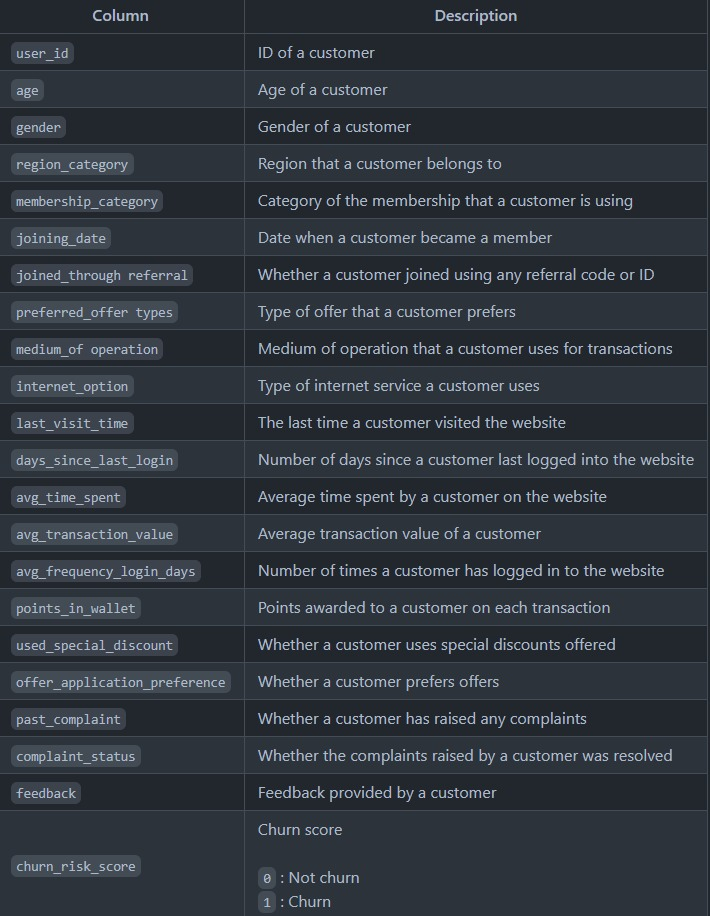

In [5]:
dup.nunique()

user_id                         36992
age                                55
gender                              2
region_category                     3
membership_category                 6
joining_date                     1096
joined_through_referral             2
preferred_offer_types               3
medium_of_operation                 3
internet_option                     3
last_visit_time                 30101
days_since_last_login              27
avg_time_spent                  24243
avg_transaction_value           36894
avg_frequency_login_days          971
points_in_wallet                23564
used_special_discount               2
offer_application_preference        2
past_complaint                      2
complaint_status                    5
feedback                            9
churn_risk_score                    2
dtype: int64

In [6]:
dup.duplicated().sum()

18

we will delete duplicate data

In [7]:
dup = df.drop_duplicates(keep='first')

In [8]:
dup.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000
mean,37.118161,-41.915576,279.147450,29271.194003,14.658617,623.562421,0.540982
std,15.867412,228.819900,329.947709,19444.806226,9.479184,270.263994,0.498324
min,10.000000,-999.000000,0.000000,800.460000,0.000000,0.000000,0.000000
25%,23.000000,8.000000,60.102500,14177.540000,7.000000,574.135000,0.000000
50%,37.000000,12.000000,161.765000,27554.485000,14.000000,680.370000,1.000000
75%,51.000000,16.000000,356.515000,40855.110000,22.000000,757.002500,1.000000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,1.000000


## 4-1 Histogram Visualization

In [9]:
def plot_hist(data, title, x_label):
  #create hist plot
  plt.figure(figsize=(7, 5))
  sns.histplot(data, kde=True, bins=20, edgecolor='black')

  #Title and Labels
  plt.xlabel(x_label)
  plt.ylabel('count')
  plt.title(title)

  plt.show()

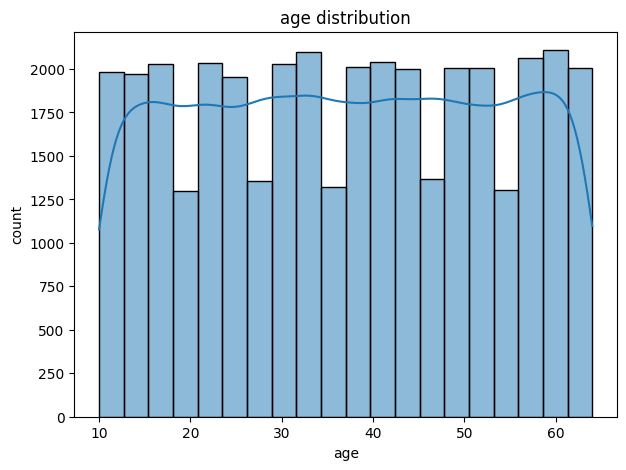

In [10]:
plot_hist(data=dup['age'], title='age distribution', x_label='age')

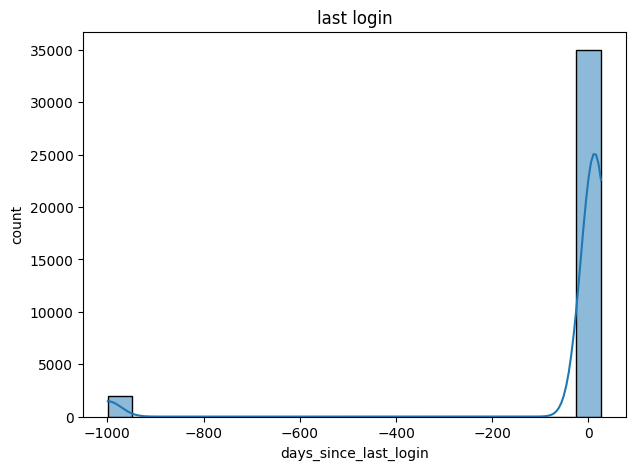

In [11]:
plot_hist(data=dup['days_since_last_login'], title='last login', x_label='days_since_last_login')

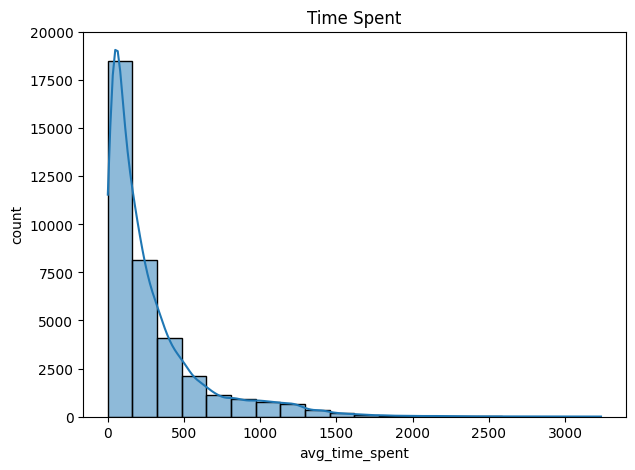

In [12]:
plot_hist(data=dup['avg_time_spent'], title='Time Spent', x_label='avg_time_spent')

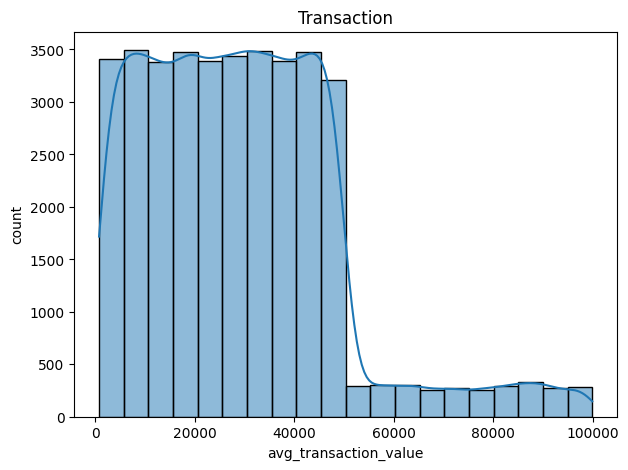

In [13]:
plot_hist(data=dup['avg_transaction_value'], title='Transaction', x_label='avg_transaction_value')

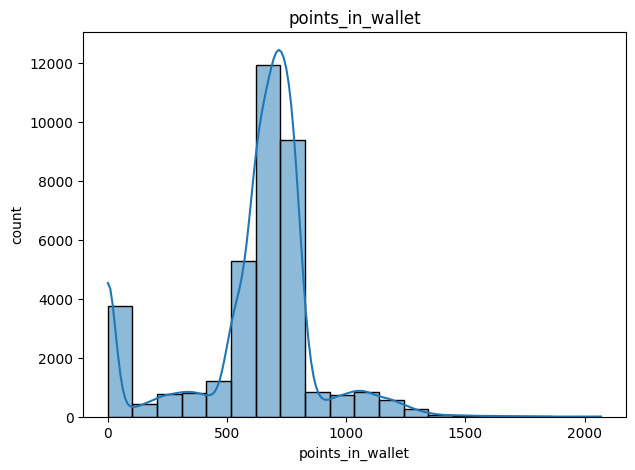

In [14]:
plot_hist(data=dup['points_in_wallet'], title='points_in_wallet', x_label='points_in_wallet')

## 4-2 Customer Distribution

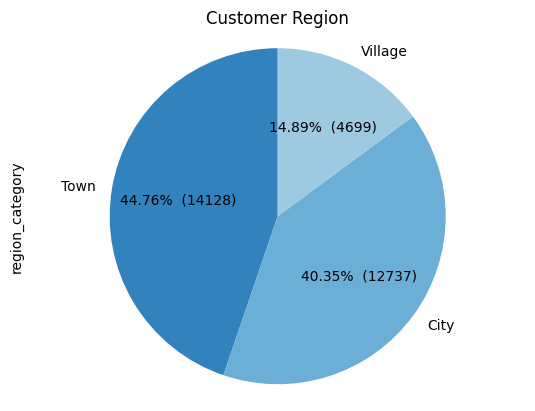

In [15]:
#count region values
reg = dup.region_category.value_counts()

# funnction to show percent in plot
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

# Define a custom color palette
colors = plt.cm.tab20c.colors

# plot the data
reg.plot.pie(autopct=make_autopct(reg), startangle=90, colors=colors)
plt.title('Customer Region')
plt.axis('equal')
plt.show()

## 4-3 Membership Distribution

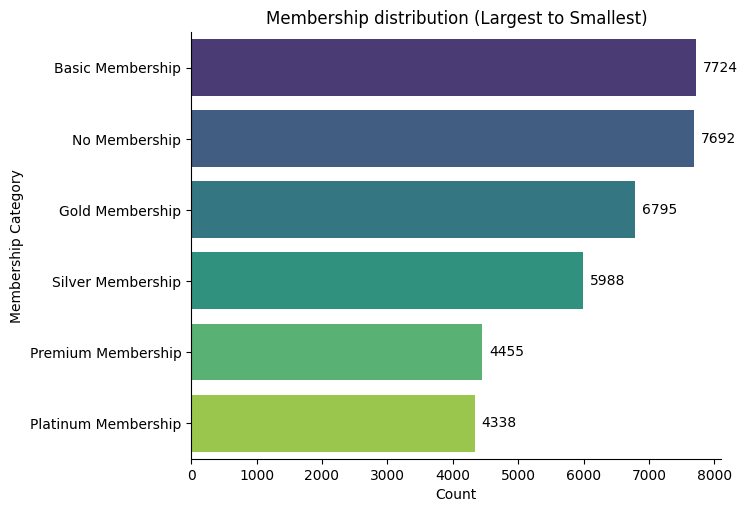

In [16]:
# Sort the DataFrame by the count of each 'membership_category' in descending order
dup_sorted = dup['membership_category'].value_counts().reset_index().sort_values(by='membership_category', ascending=False)
dup_sorted.columns = ['membership_category', 'count']

# Create the catplot using the sorted DataFrame
g = sns.catplot(y='membership_category', x='count', kind='bar', data=dup_sorted, height=5, aspect=1.5, palette='viridis')

# Add labels to the bars
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2), xytext=(5, 0), textcoords='offset points', ha='left', va='center')

plt.title('Membership distribution (Largest to Smallest)')
plt.xlabel('Count')
plt.ylabel('Membership Category')
plt.show()

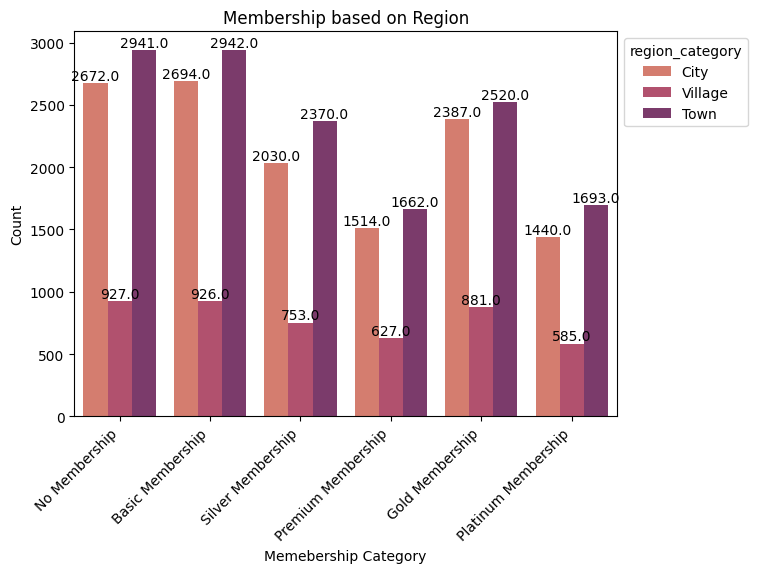

In [17]:
# Create CountPlot
plt.figure(figsize=(7,5))
g = sns.countplot(x='membership_category',hue='region_category', data=dup, palette='flare')

# rotate x labels and move legend outside of the plot
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right")
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))

#number in visualization
for p in g.patches:
    height = p.get_height()
    g.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)

# Title
plt.xlabel('Memebership Category')
plt.ylabel('Count')
plt.title('Membership based on Region')

plt.show()

## 4-4 Complaint Customer

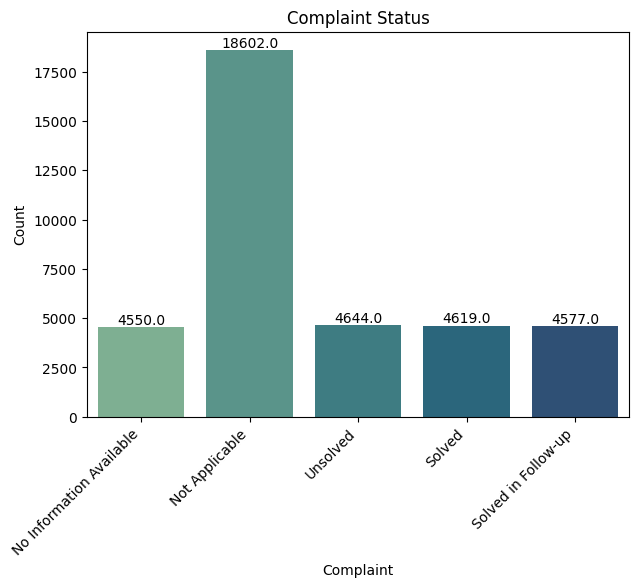

In [18]:
# Create CountPlot
plt.figure(figsize=(7,5))
g = sns.countplot(x='complaint_status', data=dup, palette='crest')

# rotate x labels and move legend outside of the plot
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right")

#number in visualization
for p in g.patches:
    height = p.get_height()
    g.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)

# Title
plt.xlabel('Complaint')
plt.ylabel('Count')
plt.title('Complaint Status')

plt.show()

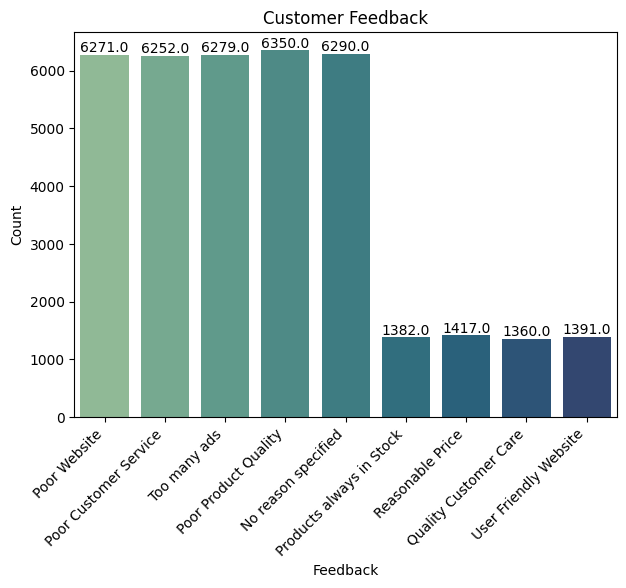

In [19]:
# Create CountPlot
plt.figure(figsize=(7,5))
g = sns.countplot(x='feedback', data=dup, palette='crest')

# rotate x labels and move legend outside of the plot
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right")

#number in visualization
for p in g.patches:
    height = p.get_height()
    g.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)

# Title
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.title('Customer Feedback')

plt.show()

## 4-5 Churn Risk Visualization

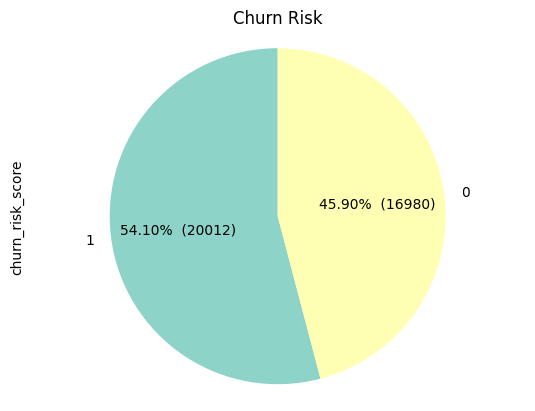

In [20]:
#count churn
ch = dup.churn_risk_score.value_counts()

# funnction to show percent in plot
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

# Define a custom color palette
colors = plt.cm.Set3.colors

# plot the data
ch.plot.pie(autopct=make_autopct(ch), startangle=90, colors=colors)
plt.title('Churn Risk')
plt.axis('equal')
plt.show()

In [21]:
def plot_countplot_with_numbers(data, x, hue, title, palette, figsize=(7, 5)):
    # Create CountPlot
    plt.figure(figsize=figsize)
    g = sns.countplot(x=x, hue=hue, data=data, palette=palette)

    # Rotate x labels and move legend outside of the plot
    g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right")
    sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))

    # Number in visualization
    for p in g.patches:
        height = p.get_height()
        g.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)

    # Title and labels
    plt.xlabel(x)
    plt.ylabel('Count')
    plt.title(title)

    plt.show()

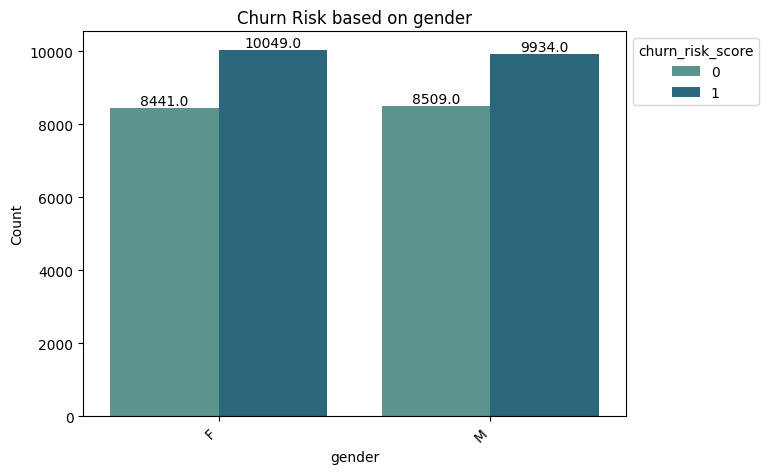

In [22]:
plot_countplot_with_numbers(data=dup, x='gender', hue='churn_risk_score', title='Churn Risk based on gender', palette='crest', figsize=(7, 5))

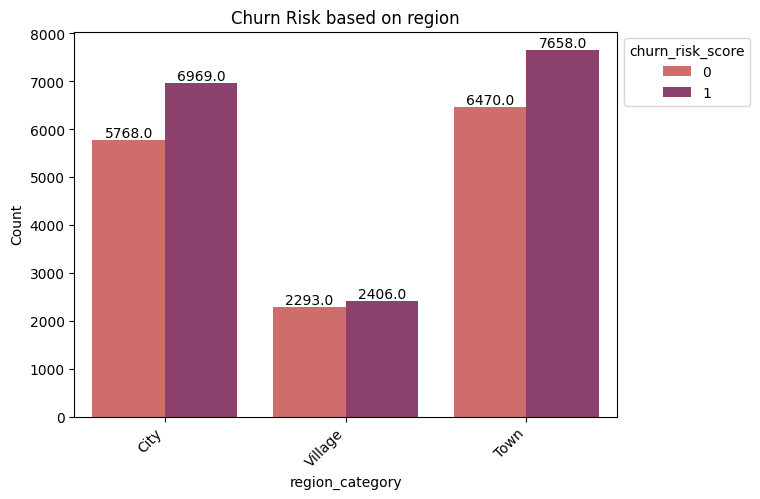

In [23]:
plot_countplot_with_numbers(data=dup, x='region_category', hue='churn_risk_score', title='Churn Risk based on region', palette='flare', figsize=(7, 5))

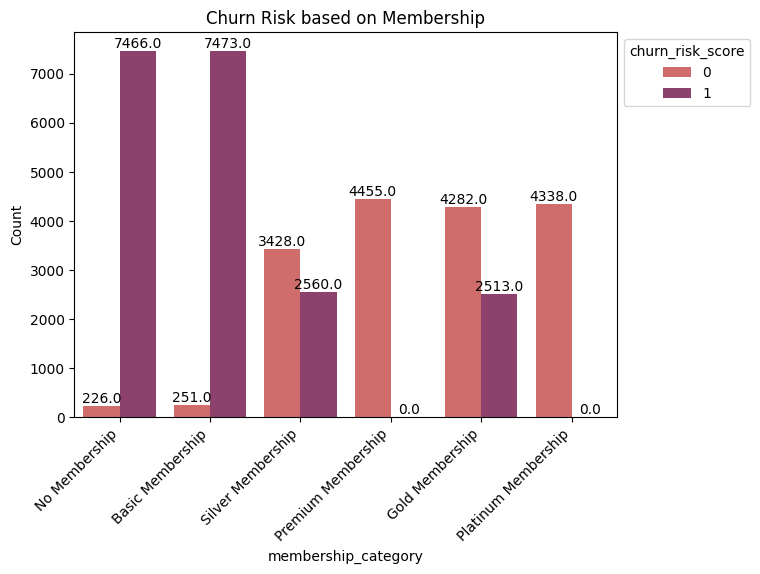

In [24]:
plot_countplot_with_numbers(data=dup, x='membership_category', hue='churn_risk_score', title='Churn Risk based on Membership', palette='flare', figsize=(7, 5))

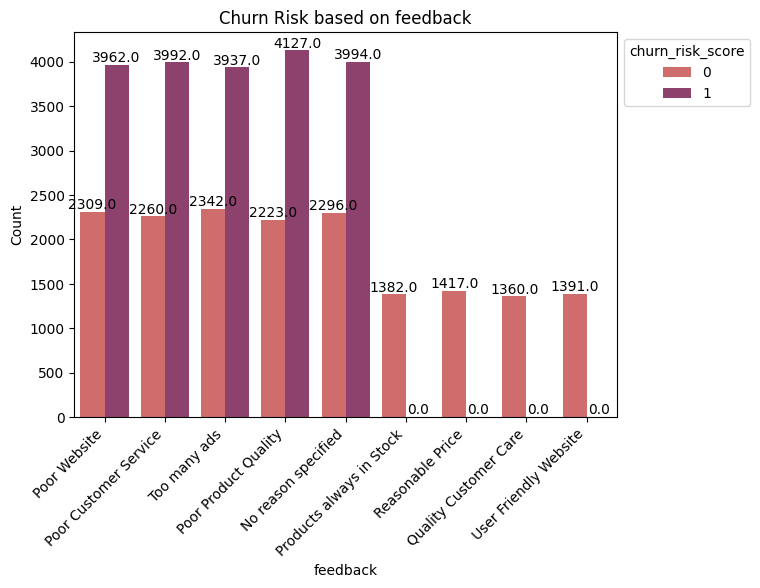

In [25]:
plot_countplot_with_numbers(data=dup, x='feedback', hue='churn_risk_score', title='Churn Risk based on feedback', palette='flare', figsize=(7, 5))

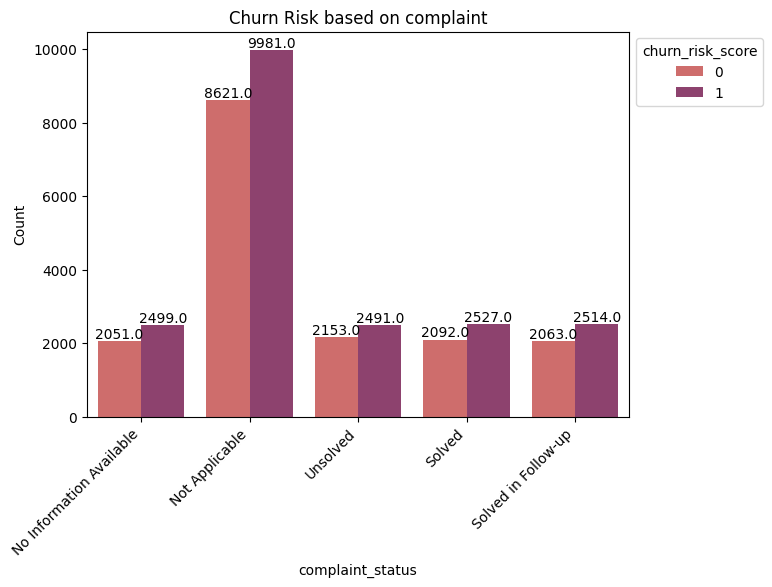

In [26]:
plot_countplot_with_numbers(data=dup, x='complaint_status', hue='churn_risk_score', title='Churn Risk based on complaint', palette='flare', figsize=(7, 5))

## 4-6 EDA Insight

**BULLET POINTS**

1. Umur pada platform dengar dimulai dari 10 tahun hingga 60 tahunan tetapi tidak lebih dari 70 tahun  
2. Aplikasi dengar selalu digunakan oleh para pennggunanya, sedikit yang jarang menggunakan aplikasi dedngar secara rutin
3. Aplikasi dengar digunakan dengan rata2 waktu 279 jam pada setiap pengguna
4. transaksi yang terjadi banyak pada kisaran 0 - 50.000
5. para pengguna banyak memiliki point pada wallet mereka
6. Town merupakan pengguna dengar paling banyak diikuti pada city dan village
7. basic membership merupakan pilihan berlangganan terlaris dan yang paling jarang dibeli adalah platinum membership
8. pengguna di city dan village lebih cenderung memilih paket no membership sedangkan pengguna di town lebih cenderung memilih paket basic membership
9. pada complaint status para pengguna lebih banyak tidak memberikan complaint
10. Complaint terbanyak adalah mengenai poor product quality
11. Berdasarkan data diketahui bahwa dari data lebih cenderung pengguna melakukan churn
12. tidak ada hubungan churn dengan gender dan region
13. pelanggan dengan basic membership kemungkinan besar akan churn sedangkan pada paket berbayar lainnya jarang terjadi
14. pelanggan yang melakukan complaint  dan churn yang negative akan churn

**TEXT INSIGHT**

Platform Dengar memiliki pengguna dengan umur 10-60 tahun, aplikasi dengar sudah menjadi keseharian dari para penggunanya karena akan digunakan secara rutin dengan rata2 waktu pendegar yang cukup tinggi yakni 279 jam per 1x membership payment,Platform Dengar memiliki pengguna yang cukup tinggi pada daerah TOWN sebesar 44,76% diikuti oleh city dan yang paling sedikit pada region village, Terdapat beberapa tipe membership yang disediakan oleh Dengar dan yang paling diminati oleh pengguna adalah basic membership dan yang jarang dibeli oleh para pengguna adalh paket platinum membership, city dan village cenderung tidak berlangganan,pada town cenderung menggunakan basic membership tidak jarang juga Dengar menerima complaint dari para pelanggan, complaint yang paling sering diterima adalah mengenai poor product quality sehingga Dengar harus segera membenahi masalah ini. Churn adalah keadaan dimana seseorang berlangganan namun tidak melanjutkan pada pembayaran berikutnya, Pada platform Dengar didapati bahwa para pelanggan cenderung melakukan churn sebesar 54,09%, gender dan region tidak mempengaruhi churn pada seseorang pelanggan. Berlangganan paket silver, premium, gold dan platinum membership jarang melakukan churn sehingga Dengar bisa berfokus untuk merubah segmentation pelanggan memasuki kelas silver keatas sehingga mengurangi churn. Pelanggan yang melakukan complaint cenderung churn sehingga perlu diperhatikan complaint dari para pelanggan agar dapat mencegah churn terjadi pada pelanggan yang akan datang.  

# 5 - Feature Engineering

## 5-1 Split between Feature and Target

In [27]:
#delete duplicated data in dataframe
df = df.drop_duplicates(keep='first')

In [28]:
# Splitting between `X` and `y`

X = df.drop('churn_risk_score', axis=1)
y = df['churn_risk_score']

In [29]:
# Splitting between Train-Set, Val-Set, and Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=20)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=20)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)

Train Size :  (26726, 21)
Val Size :  (4717, 21)
Test Size :  (5549, 21)


## 5-2 Feature Selection

based on personal judgment we dont need :
1. user id
2. gender
3. joining date
4. joined through referral
5. medium_of_operation
6. used_special_discount
7. offer_application_preference
8. complaint_status
9. last_visit_time

because having no correlation with churn_risk

In [30]:
# Drop Columns

X_train.drop(['user_id', 'gender', 'joining_date', 'joined_through_referral', 'medium_of_operation', 'used_special_discount', 'last_visit_time','offer_application_preference', 'complaint_status'], axis=1, inplace=True)
X_val.drop(['user_id', 'gender', 'joining_date', 'joined_through_referral', 'medium_of_operation', 'used_special_discount', 'last_visit_time','offer_application_preference', 'complaint_status'], axis=1, inplace=True)
X_test.drop(['user_id', 'gender', 'joining_date', 'joined_through_referral', 'medium_of_operation', 'used_special_discount', 'last_visit_time','offer_application_preference', 'complaint_status'], axis=1, inplace=True)

X_train

,age,region_category,membership_category,preferred_offer_types,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,past_complaint,feedback
33579,10,Town,Silver Membership,Without Offers,Fiber_Optic,13,102.840000,30001.24,21.0,1143.169784,No,Poor Customer Service
1786,32,NaN,Silver Membership,Gift Vouchers/Coupons,Fiber_Optic,4,38.470000,37714.51,23.0,786.260000,Yes,Poor Customer Service
28973,62,NaN,Basic Membership,Gift Vouchers/Coupons,Wi-Fi,18,33.980000,40274.14,28.0,1083.317412,No,Too many ads
20226,33,Town,Gold Membership,Credit/Debit Card Offers,Wi-Fi,10,74.820000,34636.34,12.0,716.970000,Yes,Poor Website
7061,26,NaN,Platinum Membership,Without Offers,Wi-Fi,5,191.850000,19214.72,28.0,755.070000,No,Poor Customer Service
...,...,...,...,...,...,...,...,...,...,...,...,...
8368,60,City,Gold Membership,Without Offers,Mobile_Data,6,58.570000,11040.73,13.0,610.130000,Yes,No reason specified
24293,11,Town,Silver Membership,Without Offers,Wi-Fi,8,0.000000,26169.66,24.0,0.000000,Yes,Poor Product Quality
6855,18,Town,Platinum Membership,Credit/Debit Card Offers,Wi-Fi,14,35.690000,12462.86,14.0,787.560000,Yes,Poor Customer Service
13839,46,NaN,Gold Membership,Gift Vouchers/Coupons,Mobile_Data,19,264.420000,47212.22,17.0,655.520000,No,Poor Product Quality


## 5-3 Handling Missing Values

In [31]:
X_train.isnull().sum()

age                            0
region_category             3903
membership_category            0
preferred_offer_types        222
internet_option                0
days_since_last_login          0
avg_time_spent                 0
avg_transaction_value          0
avg_frequency_login_days       0
points_in_wallet               0
past_complaint                 0
feedback                       0
dtype: int64

In [32]:
X_val.isnull().sum()

age                           0
region_category             702
membership_category           0
preferred_offer_types        34
internet_option               0
days_since_last_login         0
avg_time_spent                0
avg_transaction_value         0
avg_frequency_login_days      0
points_in_wallet              0
past_complaint                0
feedback                      0
dtype: int64

In [33]:
X_test.isnull().sum()

age                           0
region_category             823
membership_category           0
preferred_offer_types        32
internet_option               0
days_since_last_login         0
avg_time_spent                0
avg_transaction_value         0
avg_frequency_login_days      0
points_in_wallet              0
past_complaint                0
feedback                      0
dtype: int64

In [34]:
y_train.isnull().sum()

0

In [35]:
y_val.isnull().sum()

0

In [36]:
y_test.isnull().sum()

0

based on missing values we know that this is MNAR(missing not at random) where the person doesnt want to give information about his region and preferred types

## 5-4 Get Numerical and Categorical

In [37]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']
Categorical Columns :  ['region_category', 'membership_category', 'preferred_offer_types', 'internet_option', 'past_complaint', 'feedback']


## 5-5 Handling Outliers

if outliers < 50% we will handle the outliers

if outliers > 50% we will not handle the outliers

In [38]:
#function to detect outliers
def calculate_outlier_percentage(column):
    # Exclude object columns from outlier calculation
    if column.dtype == 'object':
        return 0

    # Calculate the quartiles
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count the number of outliers
    num_outliers = ((column < lower_bound) | (column > upper_bound)).sum()

    # Calculate the percentage of outliers
    percentage_outliers = (num_outliers / len(column)) * 100

    return percentage_outliers

In [39]:
outlier_percentages = df.apply(calculate_outlier_percentage)
print(outlier_percentages)

user_id                          0.000000
age                              0.000000
gender                           0.000000
region_category                  0.000000
membership_category              0.000000
joining_date                     0.000000
joined_through_referral          0.000000
preferred_offer_types            0.000000
medium_of_operation              0.000000
internet_option                  0.000000
last_visit_time                  0.000000
days_since_last_login            5.403871
avg_time_spent                   8.401817
avg_transaction_value            3.057418
avg_frequency_login_days         0.705558
points_in_wallet                18.074178
used_special_discount            0.000000
offer_application_preference     0.000000
past_complaint                   0.000000
complaint_status                 0.000000
feedback                         0.000000
churn_risk_score                 0.000000
dtype: float64


based on the statement we see that the outliers in less than 50% so we will handle the outliers with caping

In [40]:
windsoriser = Winsorizer(capping_method='iqr',tail='both')

## 5-6 Pipeline

In [41]:
num_pipeline = Pipeline(
    steps=[('imputer',SimpleImputer(strategy='median')),
           ('capping',windsoriser),
           ('scaling',MinMaxScaler())])

cat_pipeline = Pipeline(
    steps=[('imputer', SimpleImputer(strategy='most_frequent')),
            ('encode',OrdinalEncoder())])

final_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns)
])

In [42]:
# Fit and Transform

X_train = final_pipeline.fit_transform(X_train)
X_val = final_pipeline.transform(X_val)
X_test = final_pipeline.transform(X_test)
X_train.shape

(26726, 12)

# 6 - Tensorflow Pipeline

In [43]:
train_pipe = tf.data.Dataset.from_tensor_slices((X_train,y_train)).batch(32).shuffle(100).repeat(3).prefetch(tf.data.AUTOTUNE)

In [44]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# 7 - Model Sequential API

In [45]:
# Create an instance of the EarlyStopping callback

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',  # The metric to monitor (e.g., 'val_loss' or 'val_accuracy')
    patience=5,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best performance
)

## 7-1 Sequential Model

### Model Definition

IN THIS ARCHITECTURE ANN SEQUENTIAL

We use 3 Hidden layers with activation relu, we use 20 neurons on first layers, on the 2nd layers we use 15 neurons, the 3rd layers we use 10 neurons, and for output we use 1 neurons because its clasification binary.

In [46]:
# Create Sequential API
model_sq1 = Sequential()
model_sq1.add(Dense(20,
                    activation='relu',
                    kernel_initializer=tf.keras.initializers.HeNormal(seed),
                    input_shape=(12,))) # Hidden Layer 1
model_sq1.add(Dense(15,
                    activation='relu',
                    kernel_initializer=tf.keras.initializers.HeNormal(seed))) # Hidden Layer 2
model_sq1.add(Dense(10,
                    activation='relu',
                    kernel_initializer=tf.keras.initializers.HeNormal(seed))) # Hidden Layer 3
model_sq1.add(Dense(1,
                    activation='sigmoid',
                    kernel_initializer=tf.keras.initializers.GlorotNormal(seed))) # Output Layer

# Compile
model_sq1.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
model_sq1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                260       
                                                                 
 dense_1 (Dense)             (None, 15)                315       
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 746
Trainable params: 746
Non-trainable params: 0
_________________________________________________________________


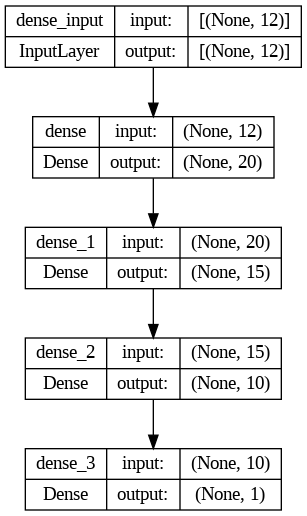

In [47]:
# Plot Layers

tf.keras.utils.plot_model(model_sq1, show_shapes=True)

### Model Training

In [48]:
# Train the Model

%%time
history_sq1 = model_sq1.fit(train_pipe,
                            epochs=25,
                            validation_data=(X_val, y_val),
                            callbacks=[early_stopping_callback])

Epoch 1/25
2508/2508 [==============================] - 18s 4ms/step - loss: 0.5167 - accuracy: 0.7404 - val_loss: 0.4768 - val_accuracy: 0.7878
Epoch 2/25
2508/2508 [==============================] - 10s 4ms/step - loss: 0.4024 - accuracy: 0.8185 - val_loss: 0.3353 - val_accuracy: 0.8461
Epoch 3/25
2508/2508 [==============================] - 9s 4ms/step - loss: 0.3018 - accuracy: 0.8541 - val_loss: 0.2952 - val_accuracy: 0.8544
Epoch 4/25
2508/2508 [==============================] - 10s 4ms/step - loss: 0.2826 - accuracy: 0.8579 - val_loss: 0.2843 - val_accuracy: 0.8529
Epoch 5/25
2508/2508 [==============================] - 10s 4ms/step - loss: 0.2769 - accuracy: 0.8585 - val_loss: 0.2798 - val_accuracy: 0.8573
Epoch 6/25
2508/2508 [==============================] - 12s 5ms/step - loss: 0.2727 - accuracy: 0.8611 - val_loss: 0.2795 - val_accuracy: 0.8561
Epoch 7/25
2508/2508 [==============================] - 11s 4ms/step - loss: 0.2704 - accuracy: 0.8607 - val_loss: 0.2779 - val_acc

### Model Evaluation

In [49]:
# Create DataFrame

history_seq_df = pd.DataFrame(history_sq1.history)
history_seq_df

,loss,accuracy,val_loss,val_accuracy
0,0.516742,0.740365,0.476776,0.787789
1,0.402391,0.818504,0.335273,0.846089
2,0.301795,0.854062,0.295195,0.854357
3,0.282634,0.857941,0.284317,0.852873
4,0.276945,0.858540,0.279754,0.857325
5,0.272710,0.861134,0.279465,0.856053
6,0.270395,0.860710,0.277871,0.853933
7,0.267907,0.863317,0.279166,0.860717
8,0.265837,0.865449,0.276847,0.852873
9,0.264864,0.865337,0.277984,0.855205


<Axes: >

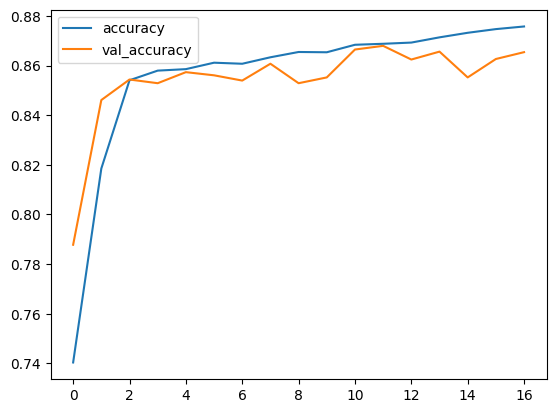

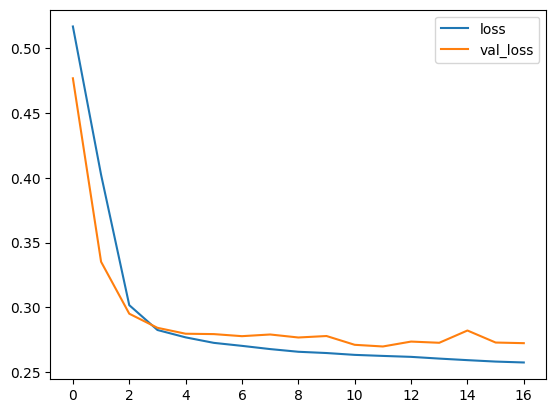

In [50]:
# Plot Training Results

history_seq_df[['accuracy', 'val_accuracy']].plot()
history_seq_df[['loss', 'val_loss']].plot()


In [51]:
# Model Evaluation of test-set
y_pred_seq = model_sq1.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

174/174 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      2514
           1       0.90      0.84      0.87      3035

    accuracy                           0.87      5549
   macro avg       0.86      0.87      0.86      5549
weighted avg       0.87      0.87      0.87      5549



## 7-2 Sequential Model Improvement

### Model Definition

IN THIS ARCHITECTURE ANN SEQUENTIAL

we use 4 hidden layer with batch normalization and activation sigmoid differ with our first model that  use relu as activation methods. in the first layer we use 30 neurons,2nd layer we use 20 neurons,3rd layer we use 25 neurons and the 4th layer we use 10 neurons and output we set the neuron to 1 because thi is classification binary.

In [55]:
# Create Sequential API
model_sq2 = Sequential()
model_sq2.add(Dense(30,
             activation='relu',
             kernel_initializer=tf.keras.initializers.HeNormal(seed),
             input_shape=(12,))) # Hidden Layer 1
model_sq2.add(BatchNormalization(momentum=0.5))
model_sq2.add(Dense(20,
             activation='sigmoid',
             kernel_initializer=tf.keras.initializers.HeNormal(seed))) # Hidden Layer 2
model_sq2.add(BatchNormalization(momentum=0.5))
model_sq2.add(Dense(25,
             activation='sigmoid',
             kernel_initializer=tf.keras.initializers.HeNormal(seed))) # Hidden Layer 3
model_sq2.add(BatchNormalization(momentum=0.5))
model_sq2.add(Dense(10,
             activation='sigmoid',
             kernel_initializer=tf.keras.initializers.HeNormal(seed))) # Hidden Layer 4
model_sq2.add(BatchNormalization(momentum=0.5))
model_sq2.add(Dense(1,
             activation='sigmoid',
             kernel_initializer=tf.keras.initializers.GlorotNormal(seed))) # Output Layer

# Compile
model_sq2.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

In [56]:
#summary
model_sq2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                390       
                                                                 
 batch_normalization (BatchN  (None, 30)               120       
 ormalization)                                                   
                                                                 
 dense_5 (Dense)             (None, 20)                620       
                                                                 
 batch_normalization_1 (Batc  (None, 20)               80        
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 25)                525       
                                                                 
 batch_normalization_2 (Batc  (None, 25)              

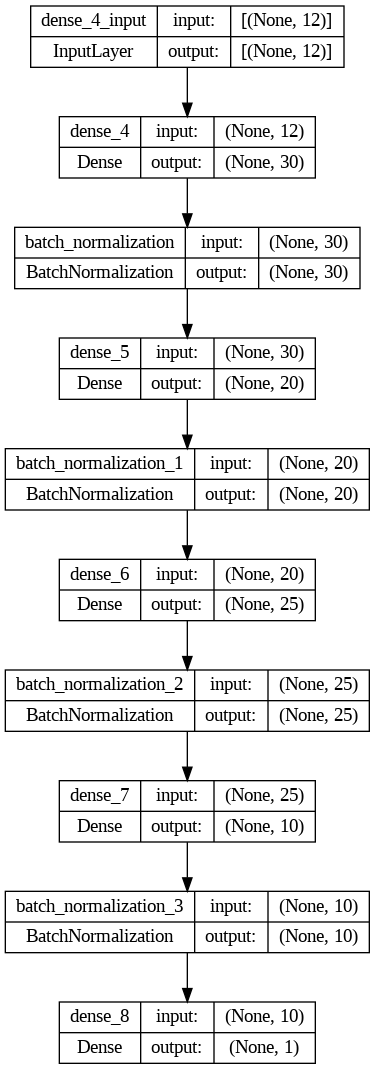

In [57]:
# Plot Layers
tf.keras.utils.plot_model(model_sq2, show_shapes=True)

### Model Training

In [58]:
# train model
%%time
history_seq2 = model_sq2.fit(train_pipe,
                            epochs=25,
                            validation_data=(X_val, y_val),
                            callbacks=[early_stopping_callback])

Epoch 1/25
2508/2508 [==============================] - 23s 8ms/step - loss: 0.4211 - accuracy: 0.7973 - val_loss: 0.3010 - val_accuracy: 0.8471
Epoch 2/25
2508/2508 [==============================] - 19s 7ms/step - loss: 0.3109 - accuracy: 0.8426 - val_loss: 0.2810 - val_accuracy: 0.8501
Epoch 3/25
2508/2508 [==============================] - 19s 7ms/step - loss: 0.2970 - accuracy: 0.8471 - val_loss: 0.2833 - val_accuracy: 0.8510
Epoch 4/25
2508/2508 [==============================] - 20s 8ms/step - loss: 0.2890 - accuracy: 0.8507 - val_loss: 0.2861 - val_accuracy: 0.8541
Epoch 5/25
2508/2508 [==============================] - 18s 7ms/step - loss: 0.2832 - accuracy: 0.8520 - val_loss: 0.2808 - val_accuracy: 0.8537
Epoch 6/25
2508/2508 [==============================] - 18s 7ms/step - loss: 0.2805 - accuracy: 0.8529 - val_loss: 0.2792 - val_accuracy: 0.8577
Epoch 7/25
2508/2508 [==============================] - 19s 8ms/step - loss: 0.2776 - accuracy: 0.8548 - val_loss: 0.2880 - val_ac

### Model Evaluation

In [59]:
# Create DataFrame

history_seq2_df = pd.DataFrame(history_seq2.history)
history_seq2_df

,loss,accuracy,val_loss,val_accuracy
0,0.421059,0.797251,0.300971,0.847149
1,0.310885,0.842563,0.280956,0.850117
2,0.297029,0.847128,0.283269,0.850965
3,0.289034,0.850720,0.286060,0.854145
4,0.283226,0.852042,0.280759,0.853721
5,0.280489,0.852927,0.279190,0.857749
6,0.277619,0.854811,0.287999,0.850753
7,0.274936,0.856731,0.279892,0.852661
8,0.272175,0.858714,0.281094,0.850329
9,0.270190,0.860436,0.274612,0.853297


<Axes: >

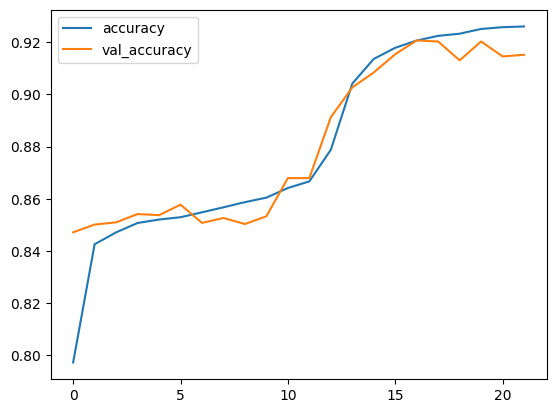

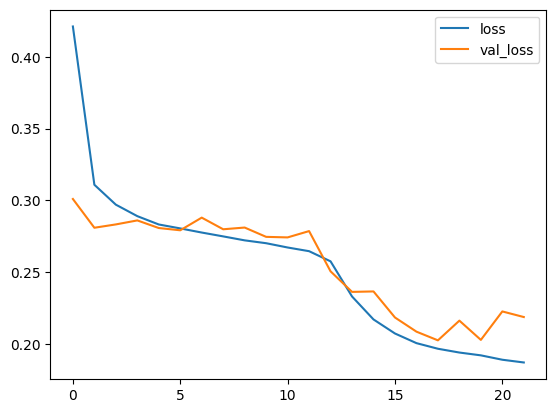

In [60]:
# Plot Training Results

history_seq2_df[['accuracy', 'val_accuracy']].plot()
history_seq2_df[['loss', 'val_loss']].plot()

In [61]:
# Model Evaluation of test-set
y_pred_seq1 = model_sq2.predict(X_test)
y_pred_seq1 = np.where(y_pred_seq1 >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq1))

174/174 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2514
           1       0.92      0.95      0.94      3035

    accuracy                           0.93      5549
   macro avg       0.93      0.93      0.93      5549
weighted avg       0.93      0.93      0.93      5549



### Insight

In [62]:
print(classification_report(y_test, y_pred_seq))
print('=========================================')
print(classification_report(y_test, y_pred_seq1))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      2514
           1       0.90      0.84      0.87      3035

    accuracy                           0.87      5549
   macro avg       0.86      0.87      0.86      5549
weighted avg       0.87      0.87      0.87      5549

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2514
           1       0.92      0.95      0.94      3035

    accuracy                           0.93      5549
   macro avg       0.93      0.93      0.93      5549
weighted avg       0.93      0.93      0.93      5549



Before improvement = 87% accuracy

After improvement = 93% accuracy

#8 - Model Functional API

In [63]:
# Clear Session

import tensorflow as tf

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

## 8-1 Functional Model

### Model Definition

In [64]:
# Input layer
inputs = Input(shape=(12,))

# Hidden layers
hidden1 = Dense(18, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(inputs)
hidden2 = Dense(6, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(hidden1)

# concate layer
concat_layer = concatenate([inputs, hidden2])
# Output layer
outputs = Dense(1, activation='sigmoid',kernel_initializer=tf.keras.initializers.GlorotNormal(seed))(concat_layer)

# Create the model
model_func = Model(inputs=inputs, outputs=outputs)

# Compile the model
model_func.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model_func.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 12)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 18)           234         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 6)            114         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 18)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

IN THIS ARCHITECTURE ANN Functional  

We use 3 Hidden layers with activation methods mostly relu, we use 20 neurons on first layers, on the 2nd layers we use 15 neurons, the 3rd layers we use 10 neurons, and for output we use 1 neurons because its clasification binary.

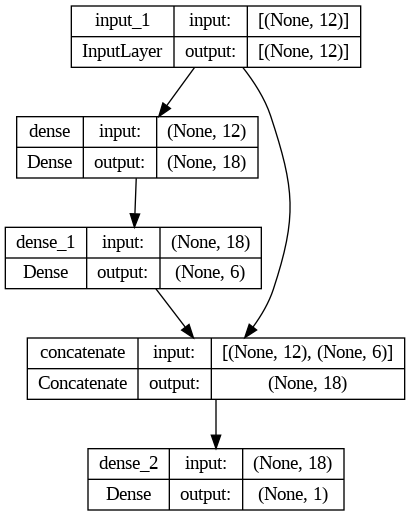

In [65]:
# Plot Layers

tf.keras.utils.plot_model(model_func, show_shapes=True)

### Model Training

In [66]:
# Train the Model

%%time
history_func = model_func.fit(train_pipe,
                              epochs=25,
                              validation_data=(X_val, y_val),
                              callbacks=[early_stopping_callback])

Epoch 1/25
2508/2508 [==============================] - 11s 4ms/step - loss: 0.5424 - accuracy: 0.7275 - val_loss: 0.5174 - val_accuracy: 0.7547
Epoch 2/25
2508/2508 [==============================] - 11s 5ms/step - loss: 0.4981 - accuracy: 0.7699 - val_loss: 0.4853 - val_accuracy: 0.7884
Epoch 3/25
2508/2508 [==============================] - 16s 6ms/step - loss: 0.4165 - accuracy: 0.8174 - val_loss: 0.3640 - val_accuracy: 0.8308
Epoch 4/25
2508/2508 [==============================] - 12s 5ms/step - loss: 0.3277 - accuracy: 0.8485 - val_loss: 0.3119 - val_accuracy: 0.8497
Epoch 5/25
2508/2508 [==============================] - 10s 4ms/step - loss: 0.2997 - accuracy: 0.8555 - val_loss: 0.3016 - val_accuracy: 0.8505
Epoch 6/25
2508/2508 [==============================] - 10s 4ms/step - loss: 0.2883 - accuracy: 0.8573 - val_loss: 0.2915 - val_accuracy: 0.8565
Epoch 7/25
2508/2508 [==============================] - 12s 5ms/step - loss: 0.2820 - accuracy: 0.8599 - val_loss: 0.2844 - val_ac

### Model Evaluation

In [67]:
# Create DataFrame

history_func_df = pd.DataFrame(history_func.history)
history_func_df

,loss,accuracy,val_loss,val_accuracy
0,0.542379,0.727494,0.517361,0.754717
1,0.498120,0.769875,0.485313,0.788425
2,0.416457,0.817406,0.364010,0.830825
3,0.327714,0.848549,0.311880,0.849693
4,0.299700,0.855521,0.301646,0.850541
5,0.288314,0.857342,0.291543,0.856477
6,0.282036,0.859937,0.284435,0.856477
7,0.278234,0.859824,0.289912,0.853509
8,0.275730,0.859513,0.279057,0.861141
9,0.274298,0.860373,0.281984,0.858173


<Axes: >

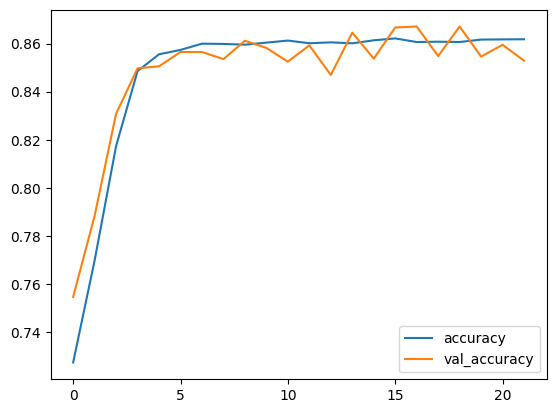

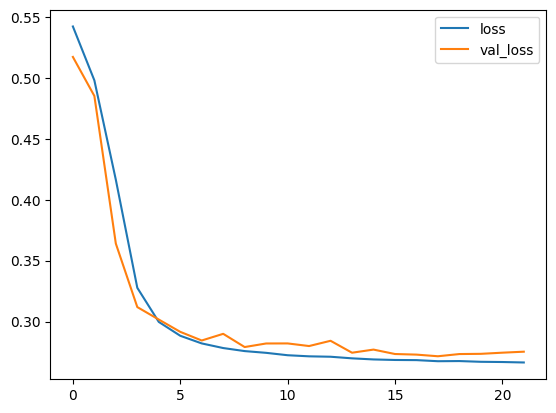

In [68]:
# Plot Training Results

history_func_df[['accuracy', 'val_accuracy']].plot()
history_func_df[['loss', 'val_loss']].plot()

In [69]:
# Model Evaluation of test-set
y_pred_func = model_func.predict(X_test)
y_pred_func = np.where(y_pred_func >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_func))

174/174 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      2514
           1       0.89      0.86      0.88      3035

    accuracy                           0.87      5549
   macro avg       0.86      0.87      0.87      5549
weighted avg       0.87      0.87      0.87      5549



## 8-2 Functional Model Improvement

### Model Definition

IN THIS ARCHITECTURE ANN Functional

we use 4 hidden layer with batch normalization and activation sigmoid differ with our first model that mostly use relu as activation methods.

In [88]:
# Input layer
inputs = Input(shape=(12,))

# Hidden layers
hidden1 = Dense(64, activation='sigmoid', kernel_initializer=tf.keras.initializers.HeNormal(seed))(inputs)
hidden1 = BatchNormalization(momentum=0.9)(hidden1)  # Apply BatchNormalization after the Dense layer
hidden2 = Dense(32, activation='sigmoid', kernel_initializer=tf.keras.initializers.HeNormal(seed))(hidden1)
hidden2 = BatchNormalization(momentum=0.9)(hidden2)  # Apply BatchNormalization after the Dense layer

hidden3 = Dense(64, activation='sigmoid', kernel_initializer=tf.keras.initializers.HeNormal(seed))(inputs)
hidden3 = BatchNormalization(momentum=0.9)(hidden3)  # Apply BatchNormalization after the Dense layer
hidden4 = Dense(32, activation='sigmoid', kernel_initializer=tf.keras.initializers.HeNormal(seed))(hidden3)
hidden4 = BatchNormalization(momentum=0.9)(hidden4)  # Apply BatchNormalization after the Dense layer

# Concatenate layer
concat_layer = concatenate([hidden2, hidden4])

# Output layer
outputs = Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotNormal(seed))(concat_layer)

# Create the model
model_func1 = Model(inputs=inputs, outputs=outputs)

# Compile the model
model_func1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

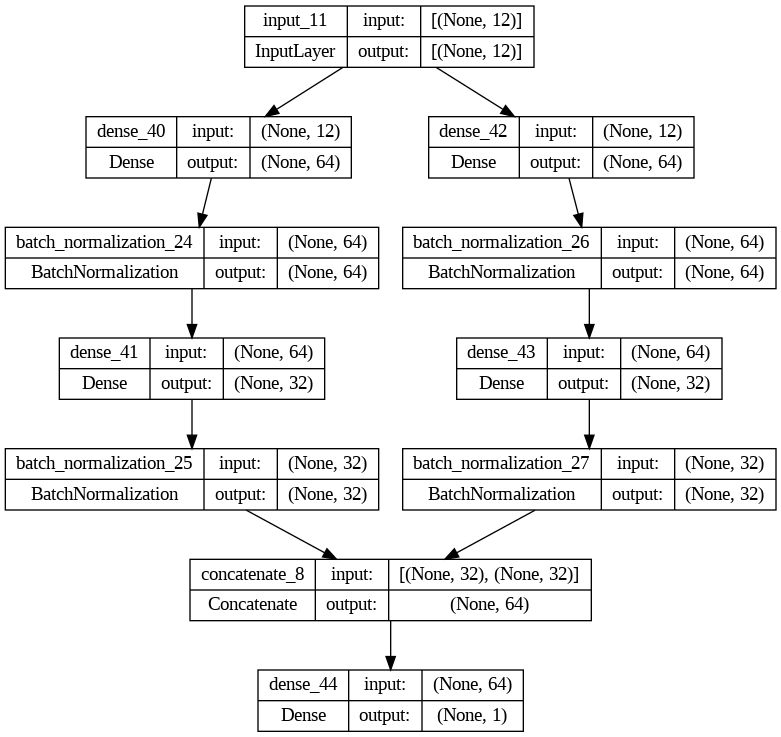

In [89]:
# Plot Layers

tf.keras.utils.plot_model(model_func1, show_shapes=True)

### Model Training

In [90]:
# Train the Model

%%time
history_func1 = model_func1.fit(train_pipe,
                              epochs=25,
                              validation_data=(X_val, y_val),
                              callbacks=[early_stopping_callback])

Epoch 1/25
2508/2508 [==============================] - 22s 7ms/step - loss: 0.4507 - accuracy: 0.7862 - val_loss: 0.3099 - val_accuracy: 0.8484
Epoch 2/25
2508/2508 [==============================] - 19s 7ms/step - loss: 0.3269 - accuracy: 0.8415 - val_loss: 0.2821 - val_accuracy: 0.8641
Epoch 3/25
2508/2508 [==============================] - 18s 7ms/step - loss: 0.2947 - accuracy: 0.8667 - val_loss: 0.2484 - val_accuracy: 0.9008
Epoch 4/25
2508/2508 [==============================] - 21s 8ms/step - loss: 0.2660 - accuracy: 0.8913 - val_loss: 0.2296 - val_accuracy: 0.9139
Epoch 5/25
2508/2508 [==============================] - 18s 7ms/step - loss: 0.2536 - accuracy: 0.8971 - val_loss: 0.2252 - val_accuracy: 0.9144
Epoch 6/25
2508/2508 [==============================] - 19s 7ms/step - loss: 0.2433 - accuracy: 0.9018 - val_loss: 0.2235 - val_accuracy: 0.9076
Epoch 7/25
2508/2508 [==============================] - 18s 7ms/step - loss: 0.2358 - accuracy: 0.9043 - val_loss: 0.2126 - val_ac

### Model Evaluation

In [91]:
# Create DataFrame

history_func1_df = pd.DataFrame(history_func1.history)
history_func1_df

,loss,accuracy,val_loss,val_accuracy
0,0.450745,0.786163,0.309934,0.848421
1,0.326888,0.841503,0.282095,0.864109
2,0.294717,0.866672,0.248387,0.900784
3,0.265963,0.891267,0.229597,0.913928
4,0.253594,0.897054,0.225208,0.914352
5,0.243331,0.901756,0.223501,0.907568
6,0.235847,0.904251,0.212602,0.909688
7,0.229694,0.906820,0.208042,0.917320
8,0.224535,0.909239,0.208665,0.912444
9,0.220227,0.911023,0.217259,0.906932


<Axes: >

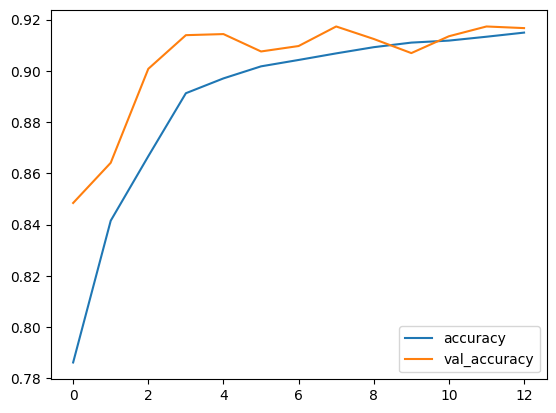

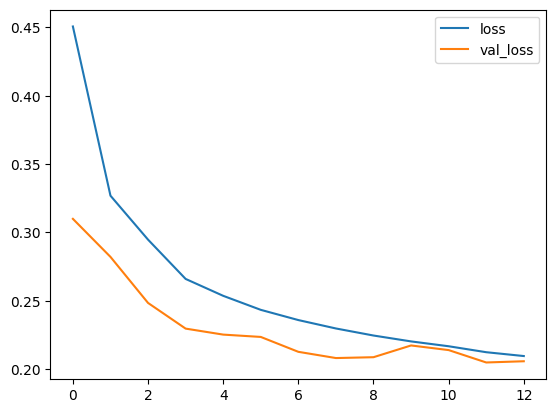

In [92]:
# Plot Training Results

history_func1_df[['accuracy', 'val_accuracy']].plot()
history_func1_df[['loss', 'val_loss']].plot()

In [93]:
# Model Evaluation of test-set
y_pred_func1 = model_func1.predict(X_test)
y_pred_func1 = np.where(y_pred_func1 >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_func1))

174/174 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      2514
           1       0.92      0.94      0.93      3035

    accuracy                           0.92      5549
   macro avg       0.92      0.92      0.92      5549
weighted avg       0.92      0.92      0.92      5549



### Insight

In [94]:
print(classification_report(y_test, y_pred_func))
print('=========================================')
print(classification_report(y_test, y_pred_func1))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      2514
           1       0.89      0.86      0.88      3035

    accuracy                           0.87      5549
   macro avg       0.86      0.87      0.87      5549
weighted avg       0.87      0.87      0.87      5549

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      2514
           1       0.92      0.94      0.93      3035

    accuracy                           0.92      5549
   macro avg       0.92      0.92      0.92      5549
weighted avg       0.92      0.92      0.92      5549



Before improvement = 86% accuracy

After Improvement = 92% accuracy

we gonna choose model improvement from Functional models because having the fastest train time and only small different with improvement sequential

# 9 - Model Saving

In [95]:
# Save Pipeline preprocessing

jb.dump(final_pipeline, 'final_pipeline.pkl')

['final_pipeline.pkl']

In [96]:
# Model Summary

model_func1.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 12)]         0           []                               
                                                                                                  
 dense_40 (Dense)               (None, 64)           832         ['input_11[0][0]']               
                                                                                                  
 dense_42 (Dense)               (None, 64)           832         ['input_11[0][0]']               
                                                                                                  
 batch_normalization_24 (BatchN  (None, 64)          256         ['dense_40[0][0]']               
 ormalization)                                                                              

In [97]:
# Freeze Model
model_func1.trainable = False
model_func1.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 12)]         0           []                               
                                                                                                  
 dense_40 (Dense)               (None, 64)           832         ['input_11[0][0]']               
                                                                                                  
 dense_42 (Dense)               (None, 64)           832         ['input_11[0][0]']               
                                                                                                  
 batch_normalization_24 (BatchN  (None, 64)          256         ['dense_40[0][0]']               
 ormalization)                                                                              

In [98]:
# Save ANN Model

model_func1.save('churn_model.h5')

# 10 - Model Inference

please try in [here](https://colab.research.google.com/drive/1WFOl2gcOr3mm2H0y2ZB_Qf88_d2Kg2Hu?usp=sharing)

# 11 - Kesimpulan

## Model Analysis

Saya telah berhasil membuat 4 arsitektur model dengan 2 sequential dan 2 functional. Kita juga telah berhasil mengimprove model berdasarkan accuracynya. saya dapat lebih meningkatkan akurasi dengan menambah batch noramlization dan menambah epoch sehingga model dapat belajar lebih lama.

Pada proses kali ini model terbaik yang dihasilkan adalah menggunakan FUNCTIONAL API dengan 4 hidden layer dan batch normalization pada setiap hidden layernya dan menggunakan activation sigmoid, dan memilki waktu train yang lebih cepat dibandingkan dengan model sequential.

**Kekurangan** dari model ini adalah sedikit overfit
improvement yang bisa kita lakukan adalah menambahkan dropout pada model definition agar mengurangi overfitting yang terjadi.

**Kelebihan** dari model kita memiliki waktu train yang cepat yaitu 4 menit dan akurasi yang tinggi 92%

## Overall Analysis

Saya telah berhasil membuat model untuk platform Dengar untuk memprediski customer akan churn atau tidak dengan menggunakan Artifical Neural Network Functional API. Selain itu saya juga menyarankan Dengar untuk lebih memperhatikan complaint dari customer dan melakukan perbaikan.